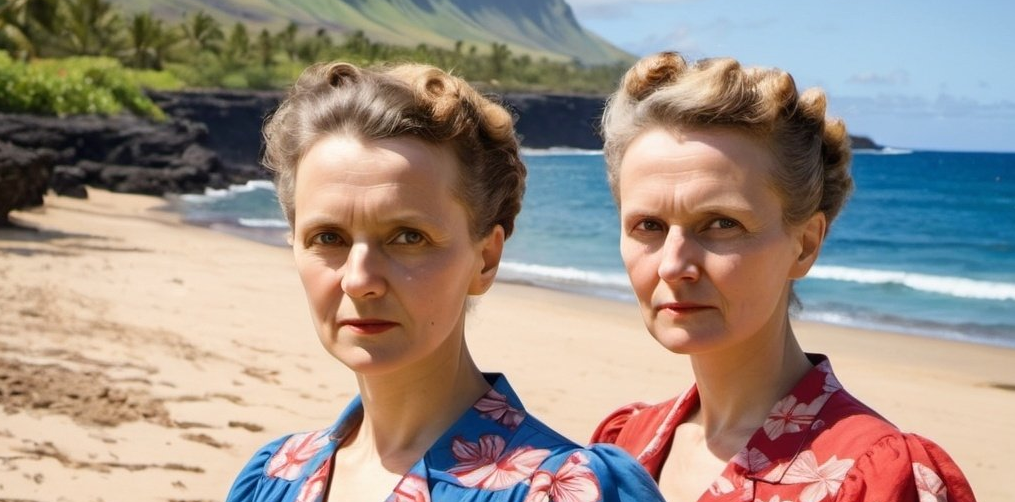

# QSL Fraunhofer -WQ14 Project Phase 1
# Task 1: Learnings from Pennylane Codebook

Team name: **TheQries**


## Reference material
* The tutorials in the Pennylane Codebook: “Introduction to Quantum Computing”, “Single-Qubit Gates” and “Circuits with Many Qubits”, (https://pennylane.ai/codebook/)

In [1]:
!pip install --quiet pennylane

# Simple computations on a single qubit

At first, we've learnt which are the main buinding blocks of a quantum algorithm: preparing states, performing operations, taking measurements. 

In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import json

In [3]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

# PREPARE THE STATE |0>
def initialize_state():
    state = np.array([1, 0])
    return state

In [4]:
#Apply a quantum operation.
def apply_u(state):
    return np.dot(U, state)

#Measure a quantum state num_meas times
def measure_state(state, num_meas):
    
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome

In [5]:
def quantum_algorithm():
    state = apply_u(initialize_state())
    measure_state(state, 100)
    return measure_state(state, 100)

Then, we've seen how to built a quantum circuit and a QNode in Pennylane, as well as a QNode decorator. 

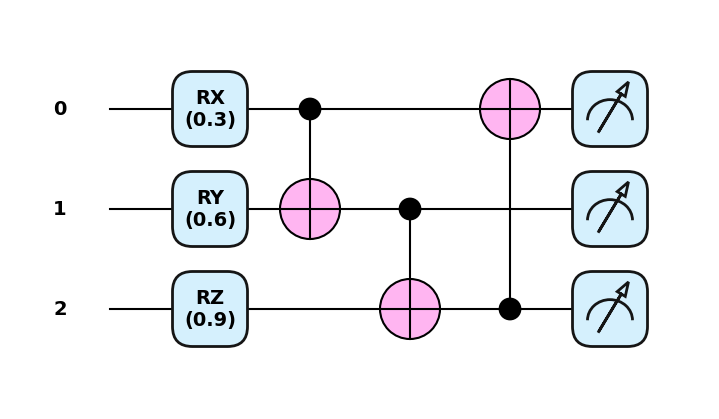

In [6]:
dev = qml.device("default.qubit", wires=3)

# DECORATE THE FUNCTION BELOW TO TURN IT INTO A QNODE
@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])

theta, phi, omega = 0.3, 0.6, 0.9

# RUN THE QNODE WITH THE PROVIDED PARAMETERS
my_circuit(theta, phi, omega)
qml.draw_mpl(my_circuit, decimals=1, style='pennylane')(theta, phi, omega)
plt.show()

Next, we've learnt how the Unitaries are implementated in Pennylane, both by means of the QubitUnitary operation and the parameterized operation Rot. 

In [7]:
qml.QubitUnitary(U, wires=0)

QubitUnitary(tensor([[ 0.70710678,  0.70710678],
        [ 0.70710678, -0.70710678]], requires_grad=True), wires=[0])

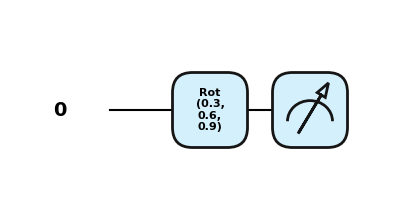

In [8]:
def apply_u_as_rot(phi, theta, omega):
    # APPLY A ROT GATE USING THE PROVIDED INPUT PARAMETERS
    qml.Rot(phi, theta, omega, wires=0)

    # RETURN THE QUANTUM STATE VECTOR
    return qml.state()
qml.draw_mpl(apply_u_as_rot, decimals=1, style='pennylane')(theta, phi, omega)
plt.show()

# Single-Qubit Gates

After this nice Introduction to the Quantum Computing, we've made a step forward towards the implementation of the single-qubit gates. 

We've learnt how to initialize the qubit's state by means of the X gate and to create uniform superpositios by means of the Hadamard gate H. Moreover, the particular operation HXH leads to a new gate, the Pauli Z, which flips the phase of the |1> state and leaves the |0> state intact and, even more interesting, it flips the |+> and |-> states into one another.  

In [9]:
dev = qml.device("default.qubit", wires=1)

# CREATE A QNODE CALLED apply_hxh THAT APPLIES TO A GIVEN CIRCUIT
@qml.qnode(dev)
def apply_hxh(state):
    if state == 1:
        qml.PauliX(0)
    qml.Hadamard(wires=0)
    qml.PauliX(0)
    qml.Hadamard(wires=0)
    return qml.state()
    
# Print your results
print(apply_hxh(0))
print(apply_hxh(1))

[1.+0.j 0.+0.j]
[ 0.+0.j -1.+0.j]


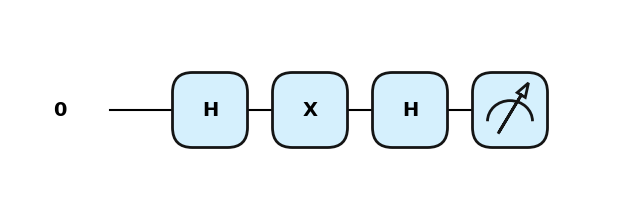

In [10]:
qml.draw_mpl(apply_hxh, style='pennylane')([0])
plt.show()

Some important aspects here are to distinguish between global and relative phases, to understand the action of the RZ gate and its matrix representation and to identify some special cases of RZ, like the phase gate, S = RZ(pi/2) and the T = RZ(pi/4) gate and their adjoints. Adjoints in PennyLane are computed by applying the 'qml.adjoint' transform to an operation before specifying its parameters and wires. 

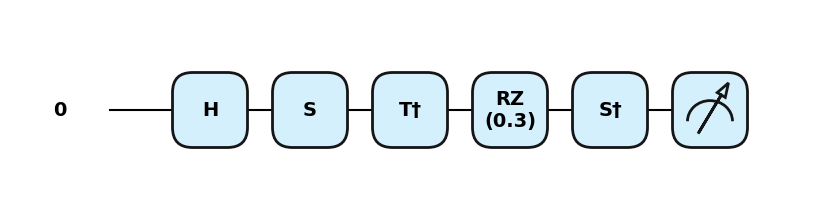

In [11]:
@qml.qnode(dev)
def many_rotations():
    # IMPLEMENT THE CIRCUIT
    qml.Hadamard(wires=0)
    qml.S(wires=0)
    qml.adjoint(qml.T(wires=0))
    qml.RZ(0.3, wires=0)
    qml.adjoint(qml.S(wires=0))
    # RETURN THE STATE
    return qml.state()
qml.draw_mpl(many_rotations, decimals=1, style='pennylane')()
plt.show()

The action of the rotations RX and RY was also investigated and implemented. Up to a global phase of -i, the $RX (pi) = X$. 

In [12]:
@qml.qnode(dev)
def apply_rx_pi(state):
    if state == 1:
        qml.PauliX(wires=0)
    # APPLY RX(pi) AND RETURN THE STATE
    qml.RX(np.pi, wires=0)
    return qml.state()

print(apply_rx_pi(0))
print(apply_rx_pi(1))


[6.123234e-17+0.j 0.000000e+00-1.j]
[0.000000e+00-1.j 6.123234e-17+0.j]


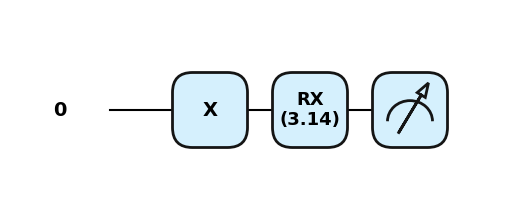

In [13]:
qml.draw_mpl(apply_rx_pi, decimals=2, style='pennylane')(1)
plt.show()

C:\Users\Manuela\anaconda3\envs\Esercitazioni\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


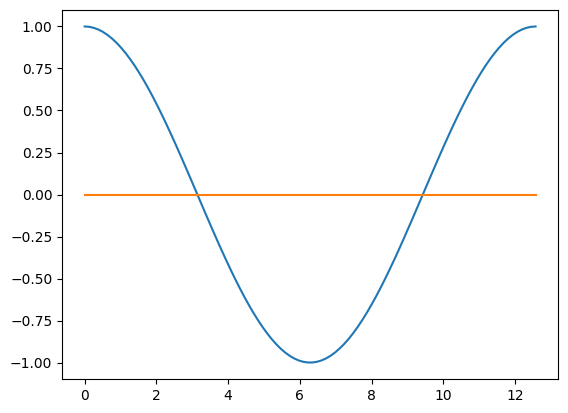

In [14]:
@qml.qnode(dev)
def apply_rx(theta, state):
    if state == 1:
        qml.PauliX(wires=0)

    # APPLY RX(theta) AND RETURN THE STATE
    qml.RX(theta, wires=0)
       
    return qml.state()

# Code for plotting
angles = np.linspace(0, 4 * np.pi, 100)
output_states_rx = np.array([apply_rx(t, 0) for t in angles])

plt.plot( angles,output_states_rx)

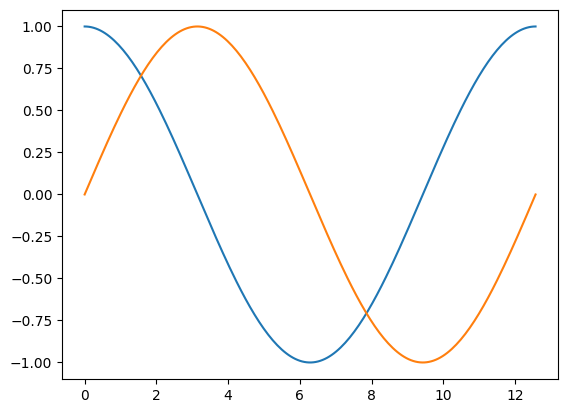

In [15]:
@qml.qnode(dev)
def apply_ry(theta, state):
    if state == 1:
        qml.PauliX(wires=0)
        
    # APPLY RY(theta) AND RETURN THE STATE
    qml.RY(theta, wires=0)
    return qml.state()

# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_ry(t, 0) for t in angles])

plt.plot(angles, output_states)

The two gates H and T form an universal gate set because with any their combination we can approximate, up to arbitrary precision, any single-qubit operation. The process of finding the right sequence of gates from the universal gates set for a given unitary matrix is called *quantum circuit synthesis*.

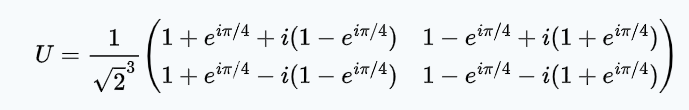

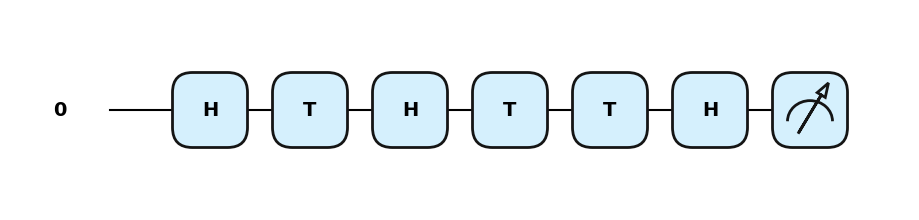

In [16]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def unitary_with_h_and_t():
    # APPLY ONLY H AND T TO PRODUCE A CIRCUIT THAT EFFECTS THE GIVEN MATRIX
    #HTHTTH
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)
    return qml.state()
qml.draw_mpl(unitary_with_h_and_t, style='pennylane')()
plt.show()


For the preparation of the qubit's state, we've discovered an automated tool, a template called MottonedStatePreparation,  which automatically prepares any normalized qubit state vector, up to a global phase. Here is an example. 

[0.52889389-0.14956775j 0.67262317+0.49545818j]



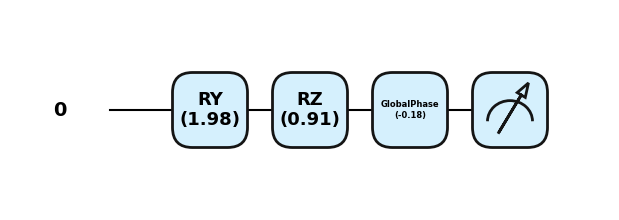

In [17]:
v = np.array([0.52889389 - 0.14956775j, 0.67262317 + 0.49545818j])
dev = qml.device("default.qubit", wires=1)

# CONSTRUCT A QNODE THAT USES qml.MottonenStatePreparation
# TO PREPARE A QUBIT IN STATE V, AND RETURN THE STATE

@qml.qnode(dev)
def prepare_state(state=v):
    qml.MottonenStatePreparation(state,wires = 0)
    return qml.state()

# draw the quantum circuit and display the output gates
print(prepare_state(v))
print()
#print(qml.draw(prepare_state, decimals = 2, style='pennylane', expansion_strategy="device")(v))
qml.draw_mpl(prepare_state, decimals = 2, style='pennylane', expansion_strategy="device")(v)
plt.show()


Regarding the measurements, we know that the outcome probabilities are related to the amplitudes of the state and by default, the measurment is done in the computational basis. But we also can choose to measure the outcome probabilities in a different basis, such as the Y basis rotation. 

In [18]:
# WRITE A QUANTUM FUNCTION THAT PREPARES (1/2)|0> + i(sqrt(3)/2)|1>
def prepare_psi():
    state = np.array([1/2, 1j*np.sqrt(3)/2])
    qml.MottonenStatePreparation(state_vector= state, wires=0)


# WRITE A QUANTUM FUNCTION THAT SENDS BOTH |0> TO |y_+> and |1> TO |y_->
def y_basis_rotation():
    qml.Hadamard(wires=0)
    qml.S(wires=0)
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def measure_in_y_basis():
    # PREPARE THE STATE
    prepare_psi()
    # PERFORM THE ROTATION BACK TO COMPUTATIONAL BASIS
    qml.adjoint(qml.S)(wires=0)
    qml.adjoint(qml.Hadamard)(wires=0)
    # RETURN THE MEASUREMENT OUTCOME PROBABILITIES
    return qml.probs(wires=0)
print(measure_in_y_basis())


[0.9330127 0.0669873]


To measure expectation values of observables in PennyLane, we can use qml.expval and specify the observable to be measured: qml.PauliX, qml.PauliY, or qml.PauliZ. The possible outcomes of measuring any Pauli-based expectation value are 1  or -1 as these are their eigenvalues.


We first compute expectation values analytically, which is impossible to do on hardware. When we run a circuit and take a measurement, we get a single data point that tells us in which state we observed a qubit for a particular run. Since this process is random, in order to get a clearer picture of the statistics we must perform the experiment many times (shots or samples). We can sample from the output distribution in order to estimate expectation values. By increasing the number of shots, we see that the estimated expectation values get closer to the analitical value.

(-0.62, -0.674, -0.7244, -0.70606, -0.706924)
(-0.6, -0.716, -0.702, -0.70662, -0.70717)
(-0.7, -0.69, -0.7164, -0.70786, -0.707386)
(-0.66, -0.694, -0.714, -0.7083, -0.706704)
(-0.68, -0.718, -0.6922, -0.70422, -0.706264)
[(-0.78, -0.732, -0.7024, -0.70912, -0.70697), (-0.78, -0.694, -0.6984, -0.7096, -0.707268), (-0.68, -0.72, -0.7104, -0.7067, -0.70709), (-0.74, -0.678, -0.71, -0.70612, -0.707376), (-0.78, -0.736, -0.7082, -0.70788, -0.70804)]


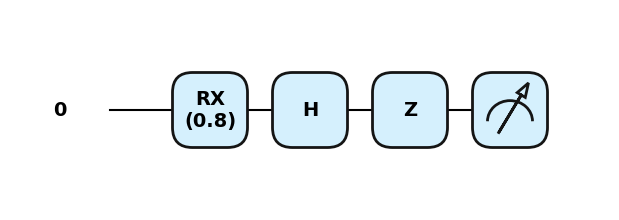

In [19]:
# An array to store your results
shot_results = []

# Different numbers of shots
shot_values = [100, 1000, 10000, 100000, 1000000]

for shots in shot_values:
    # CREATE A DEVICE, CREATE A QNODE, AND RUN IT
    dev = qml.device('default.qubit', wires=1, shots=shot_values)
    @qml.qnode(dev)
    def circuit():
        qml.RX(np.pi/4, wires=0)
        qml.Hadamard(wires=0)
        qml.PauliZ(0)
        return qml.expval(qml.PauliY(wires=0))
    print(circuit())

    # STORE RESULT IN SHOT_RESULTS ARRAY
    shot_results.append(circuit())

#print(qml.math.unwrap(shot_results))
print(shot_results)
qml.draw_mpl(circuit, decimals=1, style='pennylane')()
plt.show()

With this knowledge, we conclude the learning about the single-qubit gates and we step forward to the multi-qubit gates.   

# Circuits with many qubits

It was clearly stated since the beggining that in Pennylane, the qubits are indexed numerically from left to right and when drawing quantum circuits, the convention is that the leftmost qubit is at the top of the circuit.

We first discovered a very nice and compact way to define a circuit that produces the 3-qubit computational basis states.  

In [20]:
num_wires = 3
dev = qml.device("default.qubit", wires=num_wires)
@qml.qnode(dev)
def make_basis_state(basis_id):
     # CREATE THE BASIS STATE
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    #qml.BasisStatePreparation(bits, wires=[0, 1, 2])
    qml.BasisEmbedding(bits, wires=[0, 1, 2])
    return qml.state()
for basis_id in range (8):
    print(f"Output state = {make_basis_state(basis_id)}")

Output state = [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Output state = [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Output state = [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Output state = [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Output state = [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
Output state = [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
Output state = [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
Output state = [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]


We then defined and applied entangling operations to multi-qubit systems, defined the controlled-NOT (CNOT) gate along with its matrix representation and the others controlled operations which generally produce entangled states: qml.CRX, qml.CRY and qml.CRZ. These implement the appropriate rotation depending on the state of the control qubit.

In [21]:
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def controlled_rotations(theta, phi, omega):
    # APPLY THE OPERATIONS IN THE CIRCUIT AND RETURN MEASUREMENT PROBABILITIES
    qml.Hadamard(wires=0)
    qml.CRX(theta, wires=[0, 1])
    qml.CRY(phi, wires=[1, 2])
    qml.CRZ(omega, wires=[2, 0])
    return qml.probs(wires=[0,1,2])

theta, phi, omega = 0.1, 0.2, 0.3
print(controlled_rotations(theta, phi, omega))

[5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.98751041e-01 0.00000000e+00 1.23651067e-03 1.24480103e-05]


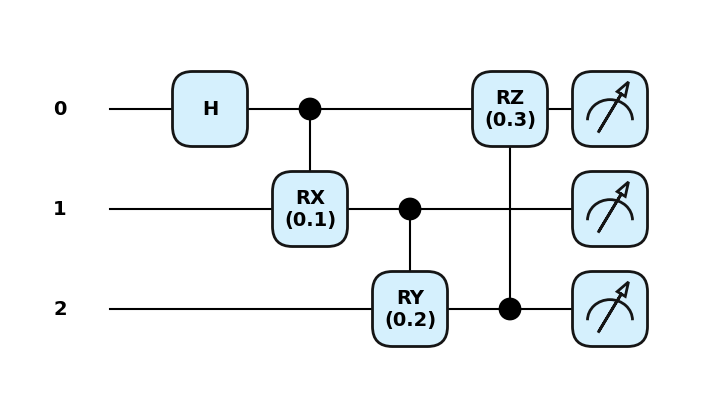

In [22]:
qml.draw_mpl(controlled_rotations, decimals=1, style='pennylane')(theta, phi, omega)
plt.show()

We've also learnt how to define and apply the most common multi-qubit operations: the controlled-Z, Toffoli, and SWAP gates. The SWAP operation (qml.SWAP) exchanges the states of two qubits and it can be implemented using only CNOT gates.

In [23]:
dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4


@qml.qnode(dev)
def apply_swap(phi, theta, omega):
    #prepare_states(phi, theta, omega)
    # IMPLEMENT THE REGULAR SWAP GATE HERE
    qml.SWAP(wires=[0,1])
    return qml.state()


@qml.qnode(dev)
def apply_swap_with_cnots(phi, theta, omega):
    #prepare_states(phi, theta, omega)
    # IMPLEMENT THE SWAP GATE USING A SEQUENCE OF CNOTS
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,0])
    qml.CNOT(wires=[0,1])
    return qml.state()


print(f"Regular SWAP state = {apply_swap(phi, theta, omega)}")
print(f"CNOT SWAP state = {apply_swap_with_cnots(phi, theta, omega)}")

Regular SWAP state = [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
CNOT SWAP state = [1.+0.j 0.+0.j 0.+0.j 0.+0.j]


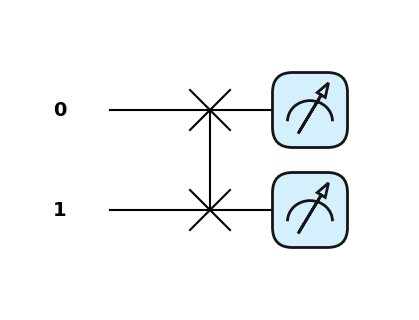

In [24]:
qml.draw_mpl(apply_swap, style='pennylane')(theta, phi, omega)
plt.show()

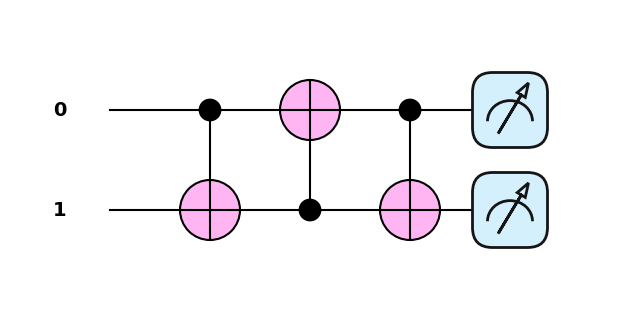

In [25]:
qml.draw_mpl(apply_swap_with_cnots, style='pennylane')(theta, phi, omega)
plt.show()

Finally, we've learnt how to write the circuits that prepare and return the famous Bell states.

In [26]:
dev = qml.device("default.qubit", wires=2)

# Starting from the state |00>, implement a PennyLane circuit to construct each of the Bell basis states.

@qml.qnode(dev)
def prepare_psi_plus():
    # PREPARE (1/sqrt(2)) (|00> + |11>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.state()

@qml.qnode(dev)
def prepare_psi_minus():
    # PREPARE (1/sqrt(2)) (|00> - |11>)
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.state()

@qml.qnode(dev)
def prepare_phi_plus():
    # PREPARE  (1/sqrt(2)) (|01> + |10>)
    qml.PauliX(wires=1)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.state()

@qml.qnode(dev)
def prepare_phi_minus():
   # PREPARE (1/sqrt(2)) (|01> - |10>)
    qml.PauliX(wires=0) 
    qml.PauliX(wires=1) 
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.state()


psi_plus = prepare_psi_plus()
psi_minus = prepare_psi_minus()
phi_plus = prepare_phi_plus()
phi_minus = prepare_phi_minus()


print(f"|ψ_+> = {psi_plus}")
print(f"|ψ_-> = {psi_minus}")
print(f"|ϕ_+> = {phi_plus}")
print(f"|ϕ_-> = {phi_minus}")

|ψ_+> = [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
|ψ_-> = [ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]
|ϕ_+> = [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
|ϕ_-> = [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]


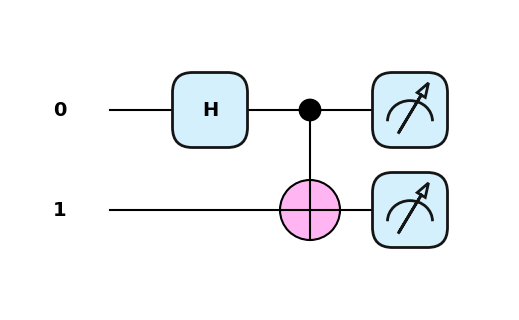

In [27]:
qml.draw_mpl(prepare_psi_plus, style='pennylane')()
plt.show()

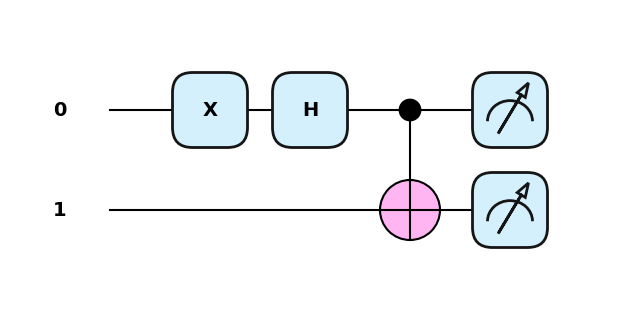

In [28]:
qml.draw_mpl(prepare_psi_minus, style='pennylane')()
plt.show()

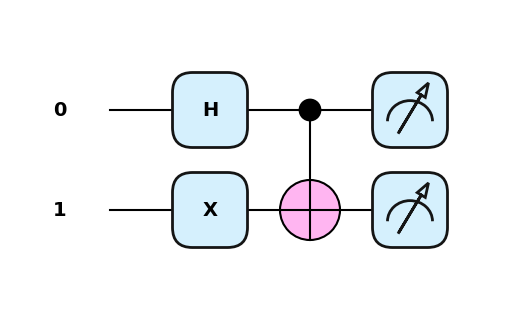

In [29]:
qml.draw_mpl(prepare_phi_plus, style='pennylane')()
plt.show()

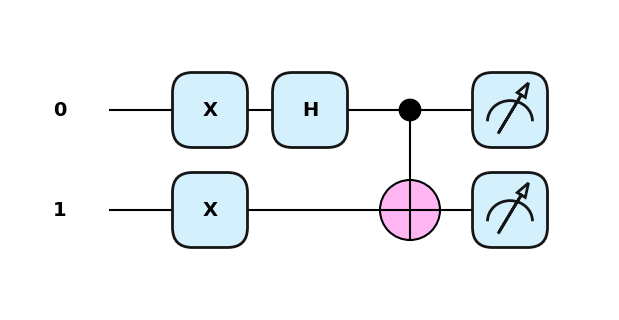

In [30]:
qml.draw_mpl(prepare_phi_minus, style='pennylane')()
plt.show()

In the very last part of this fantastic learning journey, we've implemented a Quantum Multiplexer. It consists in a 3-qubit circuit performing the following actions:

1. If the first two qubits are both |0> do nothing
2. If the first qubit is |0>  and the second is |1>, apply PauliX to the third qubit
3. If the first qubit is |1> and the second is |0>, apply PauliZ to the third qubit
4. If the first two qubits are both |1>, apply a PauliY operation the third qubit

In [31]:
dev = qml.device("default.qubit", wires=3)

# State of first 2 qubits
state = [0, 1]
@qml.qnode(device=dev)
def apply_control_sequence(state):
    # Set up initial state of the first two qubits
    if state[0] == 1:
        qml.PauliX(wires=0)
    if state[1] == 1:
        qml.PauliX(wires=1)

    # Set up initial state of the third qubit - use |->
    # so we can see the effect on the output
    qml.PauliX(wires=2)
    qml.Hadamard(wires=2)

    # IMPLEMENT THE MULTIPLEXER
    # IF STATE OF FIRST TWO QUBITS IS 01, APPLY X TO THIRD QUBIT
    qml.PauliX(wires=0)
    qml.Toffoli(wires=[0,1,2])
    qml.PauliX(wires=0)
    # IF STATE OF FIRST TWO QUBITS IS 10, APPLY Z TO THIRD QUBIT
    qml.PauliX(wires=1)
    qml.Hadamard(wires=2)
    qml.Toffoli(wires=[0,1,2])
    qml.Hadamard(wires=2)
    qml.PauliX(wires=1)
    # IF STATE OF FIRST TWO QUBITS IS 11, APPLY Y TO THIRD QUBIT
    qml.adjoint(qml.S)(wires=2)
    qml.Toffoli(wires=[0,1,2])
    qml.S(wires=2)
    return qml.state()


print(apply_control_sequence(state))

[ 0.        +0.j  0.        +0.j -0.70710678+0.j  0.70710678+0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]


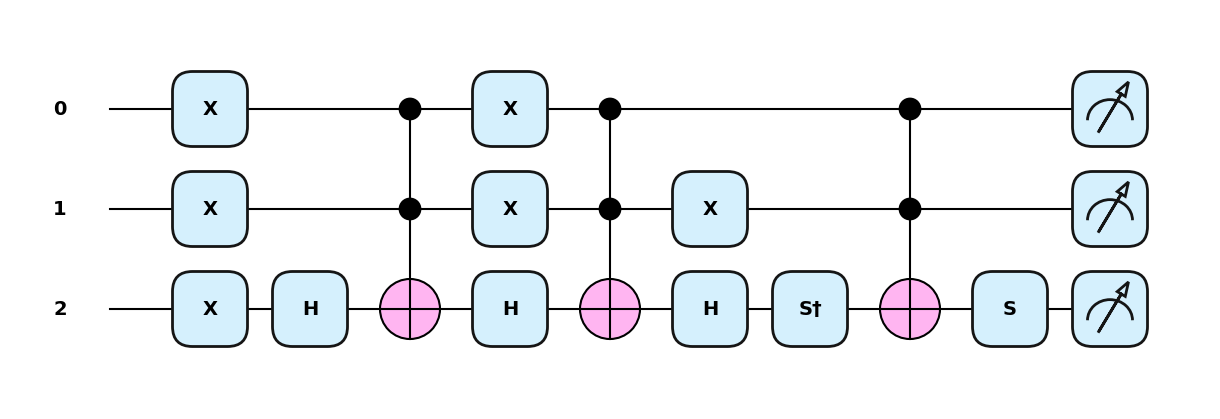

In [32]:
qml.draw_mpl(apply_control_sequence, style='pennylane')(state)
plt.show()